   Park Identification  Year  Month  Day  Consumption       Date
0                Park2  2023      2    1           60 2023-02-01
1                Park2  2023      2    2           65 2023-02-02
2                Park2  2023      2    3           70 2023-02-03
3                Park2  2023      2    4           75 2023-02-04
4                Park2  2023      3    5           80 2023-03-05
5                Park2  2023      3    6           85 2023-03-06
6                Park2  2023      3    7           90 2023-03-07
7                Park1  2023      2    1           45 2023-02-01
8                Park1  2023      2    2           50 2023-02-02
9                Park1  2023      2    3           55 2023-02-03
10               Park1  2023      2    4           60 2023-02-04
11               Park1  2023      3    5           65 2023-03-05
12               Park1  2023      3    6           70 2023-03-06
13               Park1  2023      3    7           75 2023-03-07


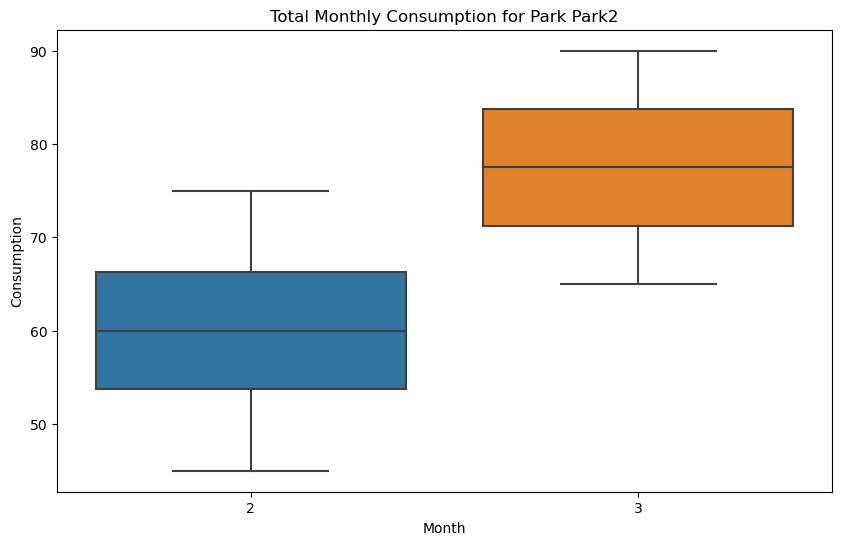

"\ndef calculate_monthly_cost(df, num_parks, park_id):\n    # Filter the data for the given park\n    filtered_df = df[df['Park Identification'] == park_id]\n\n    # Calculate average monthly cost\n    avg_monthly_cost = filtered_df['Cost (euros)'].mean()\n\n    return avg_monthly_cost\n\n\ndef analyze_statistics(df, park_id):\n    # Filter the data for the given park\n    filtered_df = df[df['Park Identification'] == park_id]\n\n    # Calculate statistics\n    mean = filtered_df['Consumption'].mean()\n    median = filtered_df['Consumption'].median()\n    std_dev = filtered_df['Consumption'].std()\n    skewness = filtered_df['Consumption'].skew()\n\n    return mean, median, std_dev, skewness\n\n\ndef create_frequency_tables(df, park_id):\n    # Filter the data for the given park\n    filtered_df = df[df['Park Identification'] == park_id]\n\n    # Calculate class width\n    class_width = (filtered_df['Consumption'].max() - filtered_df['Consumption'].min()) / 5\n\n    # Create bins\n    

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load the data
df = pd.read_csv('WaterUsed.csv', sep=';')

# Convert Year, Month, Day to datetime
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

print(df)

# Calculate cost
df['Cost (euros)'] = df['Consumption'].apply(lambda x: 0.7 * x if x <= 50 else 0.7 * 50 + 0.15 * (x - 50))

def monthly_water_consumption(df, startMonth, endMonth, parkId):
    # Filter the data for the given park and time period
    filtered_df = df[(df['Park Identification'] == parkId) & (df['Month'] >= startMonth) & (df['Month'] <= endMonth)]

    # Group the data by 'Month' and calculate total 'Consumption' for each month
    grouped_df = filtered_df.groupby('Month')['Consumption'].sum().reset_index()

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Month', y='Consumption', data=df)
    plt.title(f'Total Monthly Consumption for Park {park_id}')
    plt.show()
    
    return 0

monthly_water_consumption(df, startMonth=1, endMonth=12, parkId='Park2')

"""
def calculate_monthly_cost(df, num_parks, park_id):
    # Filter the data for the given park
    filtered_df = df[df['Park Identification'] == park_id]

    # Calculate average monthly cost
    avg_monthly_cost = filtered_df['Cost (euros)'].mean()

    return avg_monthly_cost


def analyze_statistics(df, park_id):
    # Filter the data for the given park
    filtered_df = df[df['Park Identification'] == park_id]

    # Calculate statistics
    mean = filtered_df['Consumption'].mean()
    median = filtered_df['Consumption'].median()
    std_dev = filtered_df['Consumption'].std()
    skewness = filtered_df['Consumption'].skew()

    return mean, median, std_dev, skewness


def create_frequency_tables(df, park_id):
    # Filter the data for the given park
    filtered_df = df[df['Park Identification'] == park_id]

    # Calculate class width
    class_width = (filtered_df['Consumption'].max() - filtered_df['Consumption'].min()) / 5

    # Create bins
    bins = [filtered_df['Consumption'].min() + i * class_width for i in range(6)]

    # Create absolute frequency table
    absolute_freq, _ = np.histogram(filtered_df['Consumption'], bins=bins)

    # Create relative frequency table
    total_entries = len(filtered_df)
    relative_freq = absolute_freq / total_entries

    return absolute_freq, relative_freq


def detect_outliers(df, park_id):
    # Filter the data for the given park
    filtered_df = df[df['Park Identification'] == park_id]

    # Calculate interquartile range
    Q1 = filtered_df['Consumption'].quantile(0.25)
    Q3 = filtered_df['Consumption'].quantile(0.75)
    IQR = Q3 - Q1

    # Define outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers
    outliers = filtered_df[(filtered_df['Consumption'] < lower_bound) | (filtered_df['Consumption'] > upper_bound)]

    return outliers


def create_histogram(df, park_id):
    # Filter the data for the given park
    filtered_df = df[df['Park Identification'] == park_id]

    # Create histogram
    plt.figure(figsize=(10, 6))
    plt.hist(filtered_df['Consumption'], bins=10, color='skyblue', edgecolor='black')

    plt.xlabel('Consumption')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Water Consumption for Park {park_id}')
    plt.show()


# Example usage
park_with_highest_consumption = df.groupby('Park Identification')['Consumption'].sum().idxmax()
park_with_lowest_consumption = df.groupby('Park Identification')['Consumption'].sum().idxmin()

# Monthly bar plot
create_monthly_bar_plot(df, start_month=1, end_month=2, park_id='Park2')

# Average monthly cost
avg_cost_park2 = calculate_monthly_cost(df, num_parks=1, park_id='Park2')
print(f'Average monthly cost for Park 2: {avg_cost_park2:.2f} euros')

# Statistics comparison
stats_high = analyze_statistics(df, park_with_highest_consumption)
stats_low = analyze_statistics(df, park_with_lowest_consumption)
print('Statistics for Park with Highest Consumption:')
print(f'Mean: {stats_high[0]}, Median: {stats_high[1]}, Standard Deviation: {stats_high[2]}, Skewness: {stats_high[3]}')
print('\nStatistics for Park with Lowest Consumption:')
print(f'Mean: {stats_low[0]}, Median: {stats_low[1]}, Standard Deviation: {stats_low[2]}, Skewness: {stats_low[3]}')

# Frequency tables
absolute_freq_high, relative_freq_high = create_frequency_tables(df, park_with_highest_consumption)
absolute_freq_low, relative_freq_low = create_frequency_tables(df, park_with_lowest_consumption)
print('\nAbsolute Frequency Table for Park with Highest Consumption:')
print(absolute_freq_high)
print('\nRelative Frequency Table for Park with Highest Consumption:')
print(relative_freq_high)
print('\nAbsolute Frequency Table for Park with Lowest Consumption:')
print(absolute_freq_low)
print('\nRelative Frequency Table for Park with Lowest Consumption:')
print(relative_freq_low)

# Outliers
outliers_high = detect_outliers(df, park_with_highest_consumption)
outliers_low = detect_outliers(df, park_with_lowest_consumption)
print('\nOutliers for Park with Highest Consumption:')
print(outliers_high)
print('\nOutliers for Park with Lowest Consumption:')
print(outliers_low)

# Histograms
create_histogram(df, park_with_highest_consumption)
create_histogram(df, park_with_lowest_consumption)
"""

                    Choice
0    children's playground
1    children's playground
2            walking paths
3    children's playground
4        exercise machines
..                     ...
995          walking paths
996          walking paths
997          walking paths
998  children's playground
999  children's playground

[1000 rows x 1 columns]
Choice
children's playground    540
exercise machines         82
picnic area               79
walking paths            299
dtype: int64


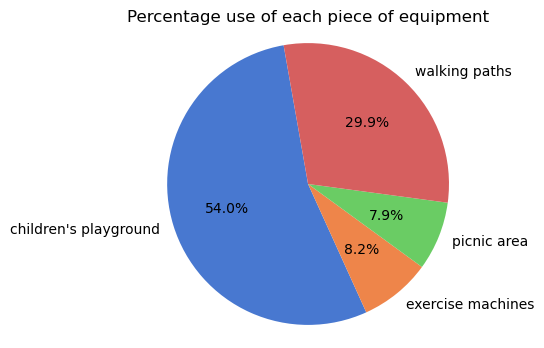

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# obter dados
data = pd.read_csv('EquipmentUsed.csv', header=0, sep=';')
print(data)

# agrupar dados
equipment_count = data.groupby('Choice').size() 
print(equipment_count)


# pie chart
plt.figure(figsize=(4, 4))
plt.pie(equipment_count, labels=equipment_count.index, autopct='%1.1f%%', startangle=100, colors=sns.color_palette('muted'))
plt.axis('equal')
plt.title('Percentage use of each piece of equipment')
#plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

   age_range would_recommend  times_visited
0          1               y             20
1          2               y              4
2          3               y             30
3          1               y             10
4          2               n              1
5          2               n              3
6          3               y             25
           count  proportion
age_range                   
1              2         1.0
2              3         0.3
3              2         1.0


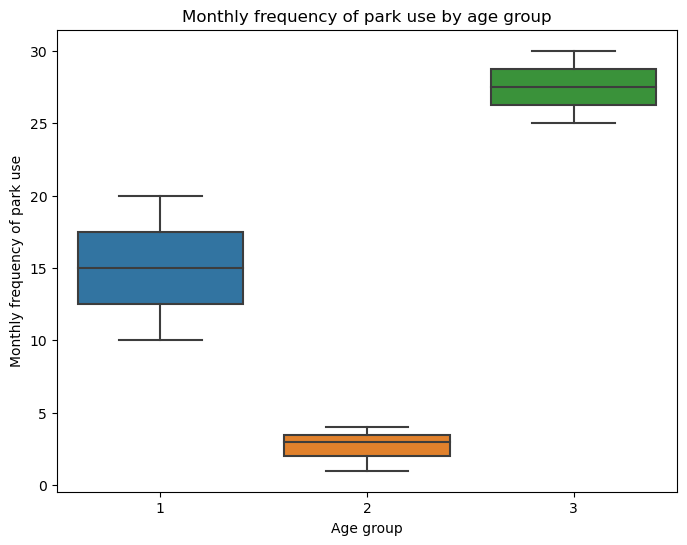

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('Inquiry.csv', header=0, sep=';')
print(data)

# agrupar age_range
age_group_count = data.groupby('age_range').size()

# calcular proporção
proportion = data.groupby('age_range')['would_recommend'].apply(lambda x: (x == 'y').sum() / len(x))
results = pd.DataFrame({'count': age_group_count, 'proportion': proportion.round(1)})
print(results)

# boxplot
data['times_visited'] = pd.to_numeric(data['times_visited'])
plt.figure(figsize=(8, 6))
sns.boxplot(x='age_range', y='times_visited', data=data)
plt.title('Monthly frequency of park use by age group')
plt.xlabel('Age group')
plt.ylabel('Monthly frequency of park use')
plt.show()